In [265]:
%matplotlib inline 
import numpy as np
import scipy as sp
import matplotlib as mpl 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import preprocessing
import seaborn as sns 

In [266]:
data=pd .read_csv('F:/jupyterwork/train.csv')

In [267]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [268]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [269]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [270]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64

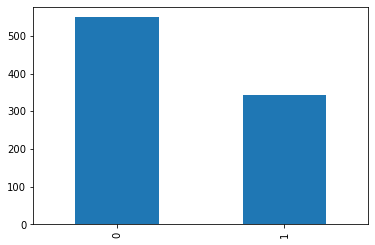

In [271]:
data ['Survived'].value_counts().plot(kind='bar')
data['Survived'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

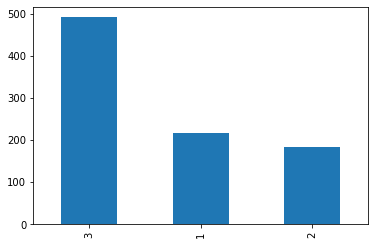

In [272]:
data ['Pclass'].value_counts().plot(kind='bar')
data['Pclass'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

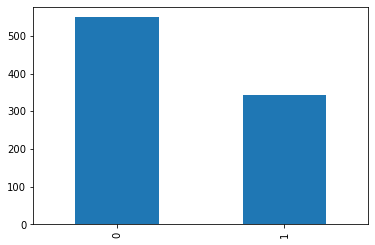

In [273]:
data ['Survived'].value_counts().plot(kind='bar')
data['Survived'].value_counts()

In [274]:
def survival_stacked_bar(variable):
    died=data[data['Survived']==0][variable].value_counts()/len(data['Survived']==0)
    survived=data[data['Survived']==1][variable].value_counts()/len(data['Survived']==0)
    dataset=pd.DataFrame([died,survived])
    dataset.index=['Meninggal','Selamat']
    dataset.plot(kind='bar',stacked=True,title='Prosentase')
    return dataset.head()

,male,female
Meninggal,0.525253,0.090909
Selamat,0.122334,0.261504


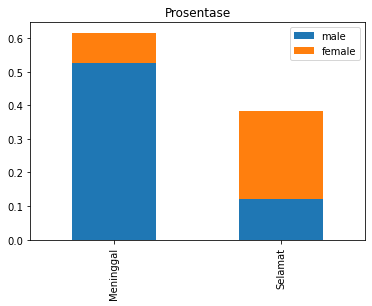

In [275]:
survival_stacked_bar('Sex')

3    491
1    216
2    184
Name: Pclass, dtype: int64

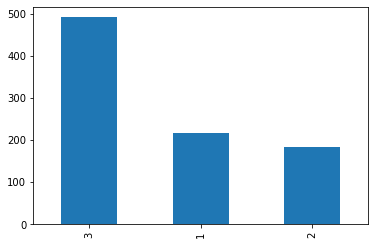

In [276]:
data ['Pclass'].value_counts().plot(kind='bar')
data['Pclass'].value_counts()

In [277]:
def survival_stacked_bar(variable):
    died=data[data['Survived']==0][variable].value_counts()/len(data['Survived']==0)
    survived=data[data['Survived']==1][variable].value_counts()/len(data['Survived']==0)
    dataset=pd.DataFrame([died,survived])
    dataset.index=['Meninggal','Selamat']
    dataset.plot(kind='bar',stacked=True,title='Prosentase')
    return dataset.head()

,1,2,3
Meninggal,0.089787,0.108866,0.417508
Selamat,0.152637,0.097643,0.133558


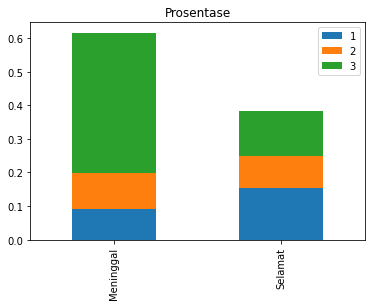

In [278]:
survival_stacked_bar('Pclass')

In [279]:
def survival_stacked_bar(variable):
    male=data[data['Sex']=='male'][variable].value_counts()/len(data['Sex']=='male')
    female=data[data['Sex']=='female'][variable].value_counts()/len(data['Sex']=='female')
    dataset=pd.DataFrame([male,female])
    dataset.index=['laki laki','perempuan']
    dataset.plot(kind='bar',stacked=True,title='Prosentase gender')
    return dataset.head()

,3,1,2
laki laki,0.389450,0.136925,0.121212
perempuan,0.161616,0.105499,0.085297


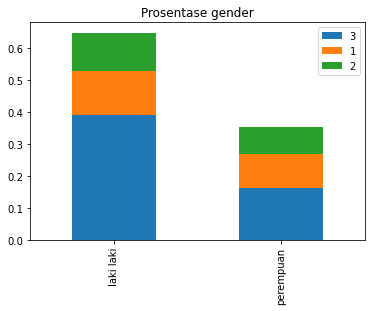

In [280]:
survival_stacked_bar('Pclass')

In [281]:
def survival_stacked_bar(variable):
    a1=data[data['Pclass']==1][variable].value_counts()/len(data['Pclass']==1)
    a2=data[data['Pclass']==2][variable].value_counts()/len(data['Pclass']==2)
    a3=data[data['Pclass']==3][variable].value_counts()/len(data['Pclass']==3)
    dataset=pd.DataFrame([a1,a2,a3])
    dataset.index=['class a','class b', 'class c']
    dataset.plot(kind='bar',stacked=True,title='Prosentase class')
    return dataset.head()

,male,female
class a,0.136925,0.105499
class b,0.121212,0.085297
class c,0.389450,0.161616


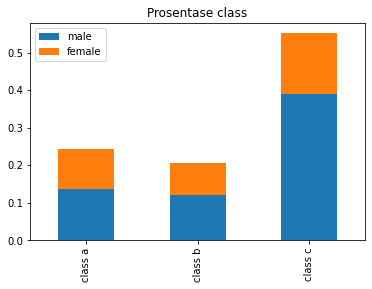

In [282]:
survival_stacked_bar('Sex')

,0,1
class a,0.089787,0.152637
class b,0.108866,0.097643
class c,0.417508,0.133558


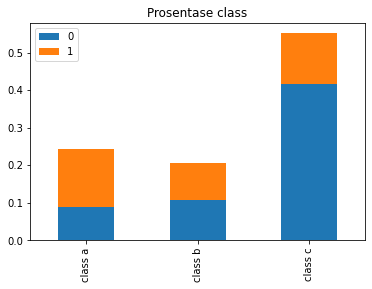

In [283]:
survival_stacked_bar('Survived')

In [284]:
def survival_stacked_bar(variable):
    s0=data[data['SibSp']==0][variable].value_counts()/len(data['SibSp']==0)
    s1=data[data['SibSp']==1][variable].value_counts()/len(data['SibSp']==1)
    s2=data[data['SibSp']==2][variable].value_counts()/len(data['SibSp']==2)
    s3=data[data['SibSp']==3][variable].value_counts()/len(data['SibSp']==3)
    s4=data[data['SibSp']==4][variable].value_counts()/len(data['SibSp']==4)
    s5=data[data['SibSp']==5][variable].value_counts()/len(data['SibSp']==5)
    s6=data[data['SibSp']==6][variable].value_counts()/len(data['SibSp']==6)
    s7=data[data['SibSp']==7][variable].value_counts()/len(data['SibSp']==7)
    s8=data[data['SibSp']==8][variable].value_counts()/len(data['SibSp']==8)
    dataset=pd.DataFrame([s0,s1,s2,s3,s4,s5,s6,s7,s8])
    dataset.index=['SibSp 0','SibSp 1', 'SibSp 2','SibSp 3','SibSp 4','SibSp 5','SibSp 6','SibSp 7','SibSp 8']
    dataset.plot(kind='bar',stacked=True,title='Prosentase class')
    return dataset.head()

,male,female
SibSp 0,0.487093,0.195286
SibSp 1,0.115600,0.118967
SibSp 2,0.016835,0.014590
SibSp 3,0.005612,0.012346
SibSp 4,0.013468,0.006734


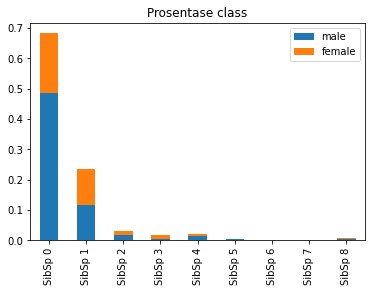

In [285]:
survival_stacked_bar('Sex')

In [286]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [287]:
data.insert(value=data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")

In [288]:
title_map={"Capt":"Officer",
          "Col":"Officer",
          "Major":"Officer",
          "Johkheer":"Royalty",
          "Don":"Royalty",
          "Sir":"Royalty",
          "Dr":"Royalty",
          "Rev":"Officer",
          "The Countess":"Royalty",
          "Dona":"Royalty",
          "Mme":"Mrs",
          "Mlle":"Miss",
          "Ms":"Mrs",
          "Mr":"Mr",
          "Mrs":"Mrs",
          "Miss":"Miss",
          "Master":"Master",
          "Lady":"royalty"}
data["Title"]=data.Title.map(title_map)

In [289]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [290]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [291]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [292]:
def survival_stacked_bar(variable):
    Mr=data[data['Title']=='Mr'][variable].value_counts()/len(data['Title']=='Mr')
    Mrs=data[data['Title']=='Mrs'][variable].value_counts()/len(data['Title']=='Mrs')
    Miss=data[data['Title']=='Miss'][variable].value_counts()/len(data['Title']=='Miss')
    Officer=data[data['Title']=='Officer'][variable].value_counts()/len(data['Title']=='Officer')
    Royalty=data[data['Title']=='Royalty'][variable].value_counts()/len(data['Title']=='Royalty')
    Master=data[data['Title']=='Master'][variable].value_counts()/len(data['Title']=='Master')
    royalty=data[data['Title']=='royalty'][variable].value_counts()/len(data['Title']=='royalty')
    dataset=pd.DataFrame([Mr,Mrs,Miss,Master,Officer,Royalty,royalty])
    dataset.index=['Mr','Mrs','Miss','Master','Officer','Royalty','royalty']
    dataset.plot(kind='bar',stacked=True,title='Prosentase TItle')
    return dataset.head()

,Mr,Mrs,Miss,Master,Officer,Royalty,royalty
Mr,0.580247,NaN,NaN,NaN,NaN,NaN,NaN
Mrs,NaN,0.142536,NaN,NaN,NaN,NaN,NaN
Miss,NaN,NaN,0.20651,NaN,NaN,NaN,NaN
Master,NaN,NaN,NaN,0.044893,NaN,NaN,NaN
Officer,NaN,NaN,NaN,NaN,0.012346,NaN,NaN


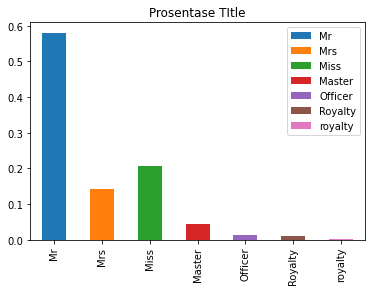

In [293]:
survival_stacked_bar('Title')

In [294]:
data["Age"].isnull().sum()

177

In [295]:
def passenger_type(row):
    if row['Age']<2:
        return 'Infant'
    elif (row['Age']>=2 and row['Age']<12):
        return 'Child'
    elif (row['Age']>=12 and row['Age']<18):
        return 'Youth'
    elif (row['Age']>=18 and row['Age']<65):
        return 'Adult'
    elif row['Age']>=65:
        return 'Senior'
    elif row['Title']=='Master':
        return 'Child'
    elif row['Title']=='Master':
        return 'Child'
    elif row['Title']=='Miss':
        return 'Child'
    elif row['Title']=='Mr' or row['Title']=='Mrs':
        return 'Adult'
    else:
        return 'Unknown'

In [296]:
data['PassengerType']=data.apply(lambda row: passenger_type(row),axis=1)

In [297]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Officer,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Child
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Adult


In [298]:
data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Title              2
PassengerType      0
dtype: int64

In [299]:
def survival_stacked_bar(variable):
    Child=data[data['PassengerType']=='Child'][variable].value_counts()/len(data['PassengerType']=='Child')
    Adult=data[data['PassengerType']=='Adult'][variable].value_counts()/len(data['PassengerType']=='Adult')
    Senior=data[data['PassengerType']=='Senior'][variable].value_counts()/len(data['PassengerType']=='Senior')
    dataset=pd.DataFrame([Child,Adult,Senior])
    dataset.index=['Child','Adult', 'Senior']
    dataset.plot(kind='bar',stacked=True,title='Prosentase PassangerType')
    return dataset.head()

,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,62.0,63.0,64.0,65.0,66.0,70.0,70.5,71.0,74.0,80.0
Child,0.011223,0.006734,0.011223,0.004489,0.003367,0.003367,0.004489,0.008979,0.002245,0.004489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004489,0.002245,0.002245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Senior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.003367,0.001122,0.002245,0.001122,0.002245,0.001122,0.001122


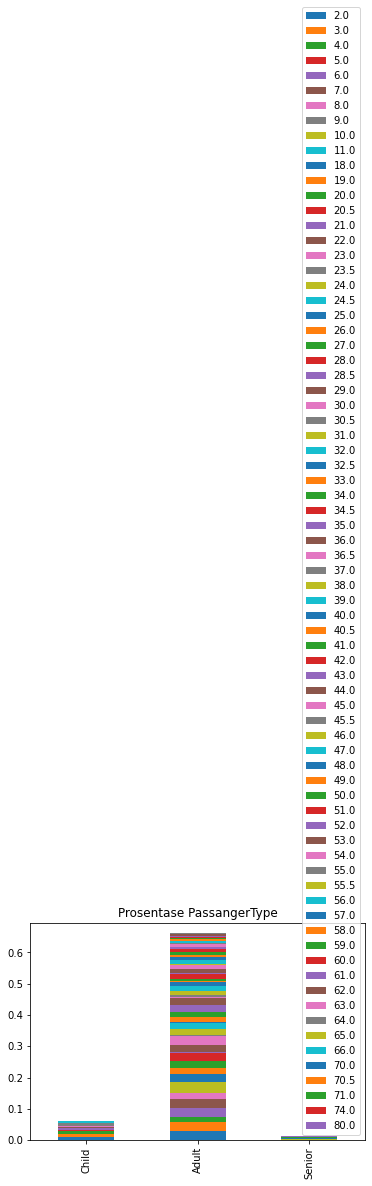

In [300]:
survival_stacked_bar('Age')

In [301]:
data['PassengerType'].value_counts()

Adult      726
Child       94
Youth       45
Infant      14
Senior      11
Unknown      1
Name: PassengerType, dtype: int64

In [302]:
sex_map={"male":1,"female":0}
data["Sex"]=data["Sex"].map(sex_map)

In [303]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Officer,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Child
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,Adult


In [304]:
type_map={"Unknown":0,"Infant":1,"Child":2,"Youth":3,"Adult":4,"Senior":5}
data["PassengerType"]=data["PassengerType"].map(type_map)

In [305]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Officer,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,4


In [306]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4


In [307]:
data1=data
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4


In [308]:
nominal = pd.get_dummies(data1['Title'])
nominal.head()

,Master,Miss,Mr,Mrs,Officer,Royalty,royalty
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


In [309]:
data2 = pd.concat([data1, nominal], axis='columns')
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,PassengerType,Master,Miss,Mr,Mrs,Officer,Royalty,royalty
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,S,Mr,4,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,C,Mrs,4,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,4,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,S,Mrs,4,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,S,Mr,4,0,0,1,0,0,0,0


In [310]:
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Title,PassengerType,Master,Miss,Mr,Mrs,Officer,Royalty,royalty
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,S,Mr,4,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,C,Mrs,4,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,S,Miss,4,0,1,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,S,Mrs,4,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,S,Mr,4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,...,S,Officer,4,0,0,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,...,S,Miss,4,0,1,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,...,S,Miss,2,0,1,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,...,C,Mr,4,0,0,1,0,0,0,0


In [311]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Officer,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,4


In [328]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Officer,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,4


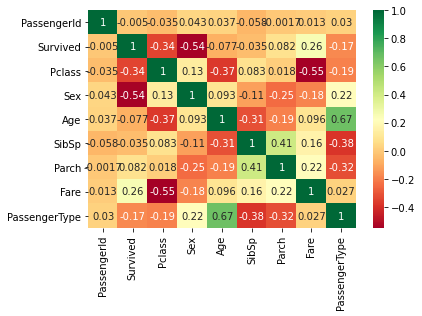

In [312]:
def titanic_corr(data):
  correlation=data.corr()
  sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
titanic_corr(data)

In [313]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,PassengerType
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.029882
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.174080
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.188228
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.216431
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.672077
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.382945
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.317768
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.027456
PassengerType,0.029882,-0.174080,-0.188228,0.216431,0.672077,-0.382945,-0.317768,0.027456,1.000000


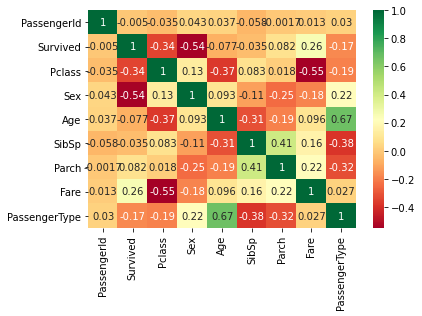

In [314]:
titanic_corr(data)

In [327]:
# data.isnull().sum()
# data.drop(["PassengerId", "Age", "SibSp", "Cabin", "Title"], inplace=True, axis=1)
# data.loc[557,:]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4


In [316]:
data['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     11
Royalty      9
royalty      1
Name: Title, dtype: int64

In [330]:
# data = data.drop([888], axis=0)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Officer,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,4


In [332]:
data = data.drop([888], axis=0)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,NaN,Q,Mrs,4
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Officer,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,4
